# Correlograms
Correlograms are plots of an auto-correlation function, which helps explain how an observation in time-series data relates to preceding observations. [1]

### Example using airplane engine noise
The following is an example correlogram using the following audio clip of an airplane engine from Youtube. The audio was extracted using www.onlinevideoconverter.com.

In [1]:
from IPython.display import HTML, Audio

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nYkVNqVhHB0" frameborder="0" allowfullscreen></iframe>')

In [6]:
# Extracted Audio
Audio("Cessna 172 - Engine Change Start Up.wav")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


We can import the data to Python and take a look at the raw values:

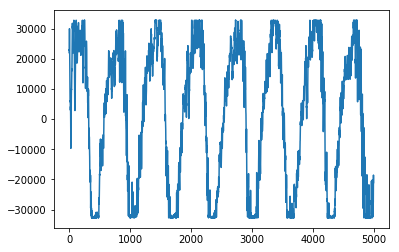

In [4]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

# Params
start_pos = 200000
count_frames = 5000

# Read in the audio
raw_data = read("Cessna 172 - Engine Change Start Up.wav")

data = np.array(raw_data[1][start_pos:start_pos + count_frames, 0], dtype=float) # Only extract one channel

plt.plot(data)
plt.show()

We can then perform a simple autocorrelation on the time series data. We can also plot the partial auto-correlation, which is the correlation minus the previous timestep correlations.

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


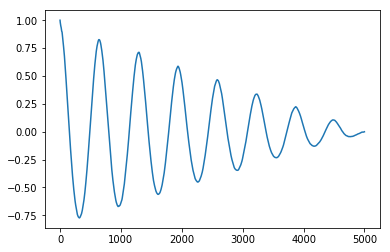

In [5]:
import statsmodels.api as sm

# Plot autocorrelation
#plt.xcorr(data, data, usevlines=False, maxlags=None, marker=None, linestyle='-')
#plt.show()

acf = sm.tsa.acf(data, nlags=10000)
#pa = sm.tsa.pacf(data, 100)

#plt.subplot(2, 1, 1)
plt.plot(acf)
#plt.subplot(2, 1, 2)
#plt.plot(pa)
plt.show()

The plot clearly shows that there is a periodic trend to the data correlation.

[1] https://dataskeptic.com/blog/episodes/2016/acf-correlograms